In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

#Import the API key.
from config import weather_api_key

#Import datetime module from datetime library
from datetime import datetime

In [2]:
#Generate a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#create a list of latitudes and longitudes
coordinates = list(lat_lngs)

In [4]:
#Create empty list to hold cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
#Check the list count to confirm >500 unique cities generated
len(cities)

625

In [5]:
#Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold weather data
city_data = []

#Print a message at the beginning of logging
print("Beginning Data Retrieval\n-------------------------")

#Create record counters
record_count = 1
set_count = 1

#Loop through all the cities in cities[]
for i, city in enumerate(cities):
    
    #Group into sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
  
        
    #Create endpoint URL with each city, removing blank spaces - concatenate names to reduce liklihood of name errors
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    #Run API requests for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data dictionary
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error occurs, skip the city and keep going
    except:
        print(f"City name {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | andselv
City name andselv not found. Skipping...
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | asau
Processing Record 5 of Set 1 | baley
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | krasnoslobodsk
Processing Record 8 of Set 1 | atar
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | ayan
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | stranda
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | poum
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | ozernovskiy
Processing Record 21 of Set 1 | gladstone
Processing Record 22 of Set 1 | dingle
Processing Record 23 of Set 1 | san c

Processing Record 184 of Set 4 | codrington
Processing Record 185 of Set 4 | lavrentiya
Processing Record 186 of Set 4 | alexandria
Processing Record 187 of Set 4 | khatanga
Processing Record 188 of Set 4 | conakry
Processing Record 189 of Set 4 | remontnoye
Processing Record 190 of Set 4 | nouadhibou
Processing Record 191 of Set 4 | funtua
Processing Record 192 of Set 4 | hofn
Processing Record 193 of Set 4 | baykit
Processing Record 194 of Set 4 | mount gambier
Processing Record 195 of Set 4 | issoire
Processing Record 196 of Set 4 | sretensk
Processing Record 197 of Set 4 | rio cuarto
Processing Record 198 of Set 4 | palabuhanratu
City name palabuhanratu not found. Skipping...
Processing Record 199 of Set 4 | maloshuyka
City name maloshuyka not found. Skipping...
Processing Record 200 of Set 4 | mahadday weyne
City name mahadday weyne not found. Skipping...
Processing Record 201 of Set 5 | humberto de campos
Processing Record 202 of Set 5 | utiroa
City name utiroa not found. Skippin

Processing Record 364 of Set 8 | meulaboh
Processing Record 365 of Set 8 | bafia
Processing Record 366 of Set 8 | tura
Processing Record 367 of Set 8 | arlit
Processing Record 368 of Set 8 | aykhal
Processing Record 369 of Set 8 | sal rei
Processing Record 370 of Set 8 | ambilobe
Processing Record 371 of Set 8 | dongsheng
Processing Record 372 of Set 8 | quelimane
Processing Record 373 of Set 8 | fianga
City name fianga not found. Skipping...
Processing Record 374 of Set 8 | sivas
Processing Record 375 of Set 8 | kirov
Processing Record 376 of Set 8 | felanitx
Processing Record 377 of Set 8 | salinopolis
Processing Record 378 of Set 8 | le vauclin
Processing Record 379 of Set 8 | aswan
Processing Record 380 of Set 8 | goya
Processing Record 381 of Set 8 | nardaran
Processing Record 382 of Set 8 | mamallapuram
Processing Record 383 of Set 8 | usinsk
Processing Record 384 of Set 8 | qaqortoq
Processing Record 385 of Set 8 | havre-saint-pierre
Processing Record 386 of Set 8 | fort morgan


Processing Record 534 of Set 11 | altay
Processing Record 535 of Set 11 | te anau
Processing Record 536 of Set 11 | kamenskoye
City name kamenskoye not found. Skipping...
Processing Record 537 of Set 11 | sataua
City name sataua not found. Skipping...
Processing Record 538 of Set 11 | ixtapa
Processing Record 539 of Set 11 | miedzyrzec podlaski
Processing Record 540 of Set 11 | yamada
Processing Record 541 of Set 11 | cap malheureux
Processing Record 542 of Set 11 | san carlos de bariloche
Processing Record 543 of Set 11 | kushmurun
Processing Record 544 of Set 11 | whithorn
Processing Record 545 of Set 11 | coihueco
Processing Record 546 of Set 11 | shenjiamen
Processing Record 547 of Set 11 | pleasanton
Processing Record 548 of Set 11 | muli
Processing Record 549 of Set 11 | karoi
Processing Record 550 of Set 11 | padang
Processing Record 551 of Set 12 | teya
Processing Record 552 of Set 12 | jiddah
City name jiddah not found. Skipping...
Processing Record 553 of Set 12 | vigeland
Pr

In [6]:
#Verify we have at least 500 cities with data
len(city_data)

566

In [7]:
#Convert city_data to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.3833,178.4167,37.24,83,30,9.69,RU,2021-05-26 02:30:08
1,Albany,42.6001,-73.9662,73.72,69,100,1.01,US,2021-05-26 02:27:48
2,Asau,46.4333,26.4000,60.40,99,23,3.51,RO,2021-05-26 02:30:09
3,Baley,51.6000,116.6333,52.21,43,40,5.59,RU,2021-05-26 02:30:09
4,Rikitea,-23.1203,-134.9692,77.79,80,50,15.75,PF,2021-05-26 02:30:09
5,Krasnoslobodsk,48.7072,44.5714,58.82,77,0,14.81,RU,2021-05-26 02:30:10
6,Atar,20.5169,-13.0499,81.34,21,7,8.93,MR,2021-05-26 02:30:10
7,Hilo,19.7297,-155.0900,79.79,79,90,10.36,US,2021-05-26 02:29:07
8,Ayan,56.4500,138.1667,42.57,59,100,7.81,RU,2021-05-26 02:30:11
9,Avarua,-21.2078,-159.7750,82.45,78,40,6.91,CK,2021-05-26 02:30:11


In [8]:
#Reorder the column 
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2021-05-26 02:30:08,69.3833,178.4167,37.24,83,30,9.69
1,Albany,US,2021-05-26 02:27:48,42.6001,-73.9662,73.72,69,100,1.01
2,Asau,RO,2021-05-26 02:30:09,46.4333,26.4000,60.40,99,23,3.51
3,Baley,RU,2021-05-26 02:30:09,51.6000,116.6333,52.21,43,40,5.59
4,Rikitea,PF,2021-05-26 02:30:09,-23.1203,-134.9692,77.79,80,50,15.75
...,...,...,...,...,...,...,...,...,...
561,Durban,ZA,2021-05-26 02:29:10,-29.8579,31.0292,63.01,82,100,1.01
562,Camiri,BO,2021-05-26 02:33:27,-20.0500,-63.5167,56.14,81,16,2.51
563,Mayo,US,2021-05-26 02:29:09,38.8876,-76.5119,73.11,90,1,7.00
564,Hatillo,PR,2021-05-26 02:33:27,18.4863,-66.8254,81.90,82,20,12.88


In [9]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export city_data into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#Create scatter plots for weather param vs. latitude:
#First extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

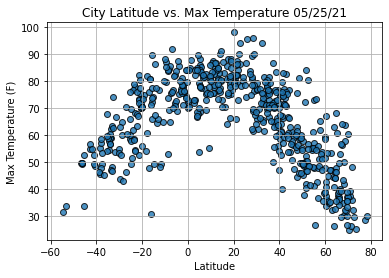

In [11]:
#Import time module to format current date
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

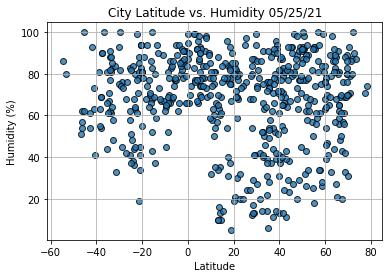

In [12]:
#Build the scatter plot for latitude vs.Humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

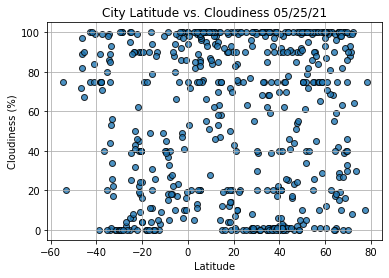

In [13]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

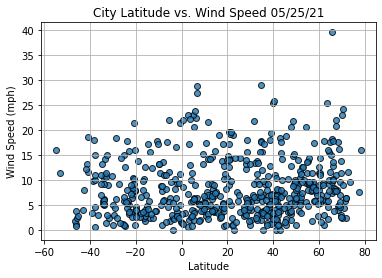

In [14]:
#Build the scatter plot for latitude vs. windspeed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()